### Agent-Lab: Adaptive RAG Agent

---

In [1]:
import os
os.chdir('..')

from notebooks import experiment_utils
from app.core.container import Container
from app.interface.api.messages.schema import MessageRequest

# start dependency injection container
container = Container()
container.init_resources()
container.wire(modules=[__name__])

/home/bsantanna/anaconda3/envs/dev/lib/python3.11/site-packages/starlette/formparsers.py:12: PendingDeprecationWarning: Please use `import python_multipart` instead.
  import multipart
Overriding of current TracerProvider is not allowed
/home/bsantanna/anaconda3/envs/dev/lib/python3.11/site-packages/pydantic/_internal/_config.py:295: PydanticDeprecatedSince20: Support for class-based `config` is deprecated, use ConfigDict instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  warnings.warn(DEPRECATION_MESSAGE, DeprecationWarning)


In [2]:
# create ollama agent
agent_id = experiment_utils.create_ollama_agent(agent_type="adaptive_rag", llm_tag="mistral-small:24b", ollama_endpoint="http://jupiter.btech.software:11434")

In [3]:
# get agent instance
adaptive_rag_agent = container.adaptive_rag_agent()

# Create Graph
workflow_builder = adaptive_rag_agent.get_workflow_builder(agent_id)
workflow = workflow_builder.compile()

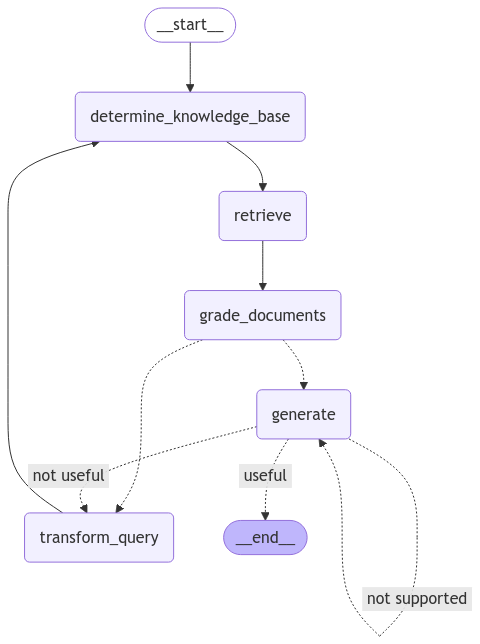

In [4]:
experiment_utils.print_graph(workflow)

In [11]:
message = MessageRequest(
    message_role="human",
    message_content="Explain what is the pinnacle of skill according to the Art of War Book",
    agent_id=agent_id
)
inputs = adaptive_rag_agent.get_input_params(message)

In [12]:
# get document repository instance
# document_repository = container.document_repository()

# populate vectorstore with documents
# experiment_utils.create_static_document(
#     embeddings_model=adaptive_rag_agent.get_embeddings_model(agent_id),
#     document_repository=document_repository,
#     file_path="tests/integration/sun_tzu_the_art_of_war.zip"
# )

In [13]:
result = workflow.invoke(inputs)
print(result['generation'])

/home/bsantanna/anaconda3/envs/dev/lib/python3.11/site-packages/httpx/_models.py:99: ResourceWarning: unclosed <socket.socket fd=70, family=2, type=1, proto=6, laddr=('192.168.2.198', 46634), raddr=('192.168.2.194', 11434)>
  for encoding in ["ascii", "utf-8"]:
2025-02-05 12:34:19,943 - httpx - INFO - HTTP Request: POST http://jupiter.btech.software:11434/api/chat "HTTP/1.1 200 OK"
2025-02-05 12:34:21,005 - httpx - INFO - HTTP Request: POST http://jupiter.btech.software:11434/api/embed "HTTP/1.1 200 OK"
/home/bsantanna/anaconda3/envs/dev/lib/python3.11/site-packages/sqlalchemy/orm/context.py:2723: ResourceWarning: unclosed <socket.socket fd=65, family=2, type=1, proto=6, laddr=('192.168.2.198', 48006), raddr=('192.168.2.194', 11434)>
  _instance = loading._instance_processor(
/home/bsantanna/anaconda3/envs/dev/lib/python3.11/site-packages/langgraph/utils/runnable.py:219: ResourceWarning: unclosed <socket.socket fd=70, family=2, type=1, proto=6, laddr=('192.168.2.198', 48008), raddr=('1

The text you provided seems to be from "The Art of War" by Sun Tzu, with commentary and explanations from various scholars. Here’s an explanation of the key points:

### Key Concepts

1. **Preparation for Siege Warfare**:
   - The preparation of siege implements such as mantlets (large shields or wheeled vehicles) and movable shelters takes three months.
   - Piling up mounds against enemy walls to discover weak points also requires three months.

2. **Disastrous Effects of a Siege**:
   - A general who loses patience may launch an assault prematurely, leading to significant losses without achieving victory.
   - This highlights the importance of strategic planning and patience in warfare.

3. **Strategic Subtlety**:
   - The ideal strategy is to subdue the enemy's troops without fighting, capture cities without sieges, and overthrow kingdoms without prolonged battles.
   - This approach minimizes casualties and maintains the integrity of one’s forces.

4. **Attacking by Stratagem**:
 